# Missing Values

In [ ]:
'''
why is data missing?
lifecycle of a Data science project
1) Data collection Statergy--from company side,3rd party APi,Survery
2) feature engineering---handling missing values

why are their missing values??
survey--Depression survey----
1) they hesitate to put down the information
2) Survey informations are not that valid
3) men--salary
4) women-- age
5) people may have died ---NAN


Data Science Projects....Dataset should be collected from multiple sources

what are the different types of missing values:

1) missing completely at random,MCAR:


data that will be missing..
1) continuous data



2) categorical data


In [1]:
import pandas as pd

In [2]:
df =pd.read_csv(r"C:\Users\DellX\Desktop\data science\titenic dataset\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.shape

(891, 12)

In [5]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [63]:
#2) missing data not at random(MNAR):systematic missing value

In [ ]:
#there is absolutely some relationship between the data missing and any other values,observed or missing within the dataset

In [6]:
import numpy as np
df["cabin_null"] =np.where(df["Cabin"].isnull(),1,0)
##find the percentage of null values
df["cabin_null"].mean()

0.7710437710437711

In [7]:
df["cabin_null"]

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32

In [69]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [8]:
df.groupby(["Survived"])["cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [75]:
### 3) missing at random(MAR):
'''
Men ...hide theit salary
womwn...hide their age'''

'\nMen ...hide theit salary\nwomwn...hide their age'

In [ ]:
###all the techniques of handling missing values
'''
1) mean,meadin and mode replacment
2) random sample Imputation
3) capturing NAN values with a new feature
4) End of distribution imputation
5) frequent catagories imputation
6) Arbitrary imputation

In [76]:
#1 )Mean Median And Mode Imputation
''' 
when should we apply?
MCAR

In [9]:
df =pd.read_csv(r"C:\Users\DellX\Desktop\data science\titenic dataset\train.csv",usecols =["Age","Fare","Survived"])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
##lets go and see the percemtage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
def input_nan(df,variable,median):
    df[variable+"_median"] =df[variable].fillna(median)

In [13]:
df["Age"].median()

28.0

In [14]:
input_nan(df,"Age",28)

In [15]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [16]:
df["Age_median"].isnull().sum()

0

In [17]:
print(df["Age"].std())
print(df["Age_median"].std())

14.526497332334044
13.019696550973194


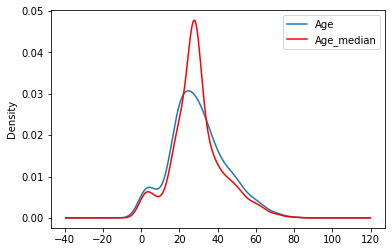

In [18]:
import matplotlib.pyplot as plt
df["Age"].plot(kind ="kde")
df["Age_median"].plot(kind ="kde",color ="red")
plt.legend()

In [19]:
##random sample Imputatuion
'''Aim : random sample imputation consists of taking random observation from the dataset and we use this obesevation to replace then nan values
when should it be used? it assumes that the data are missing completely at random(MCAR)

In [25]:
df =pd.read_csv(r"C:\Users\DellX\Desktop\data science\titenic dataset\train.csv",usecols=["Age","Fare","Survived"])

In [26]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [38]:
df["Age"].isnull().sum()

177

In [66]:
random_sample =df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state =0)

In [67]:
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [ ]:
'''def impute_nan(df,varible,median):
    df[varible+"_median"] =df[varible].fillna(median)
    df[varible+"_random"] =df[varible]
    #it will have the random sample to fill the na
    random_sample =df[varible].dropna().sample(df[varible].isnull().sum(),random_state =0)
    ##pandas need to have same index in order to marge the dataset
    random_sample.index =df

In [71]:
def impute_nan(df,variable):
    df[variable+"_random"] =df[variable]
    #it will have the random sample to fill the na
    random_sample =df[variable].dropna().sample(df[variable].isnull().sum(),random_state =0)
    ##pandas need to have same index in order to marge the dataset
    random_sample.index =df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] =random_sample

In [72]:
impute_nan(df,"Age")

In [73]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [45]:
#df[df["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [46]:
#random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [60]:
#df.loc[df["Age"].isnull(),"Age"] = random_sample

In [61]:
#df["Age"].isnull().sum()

177

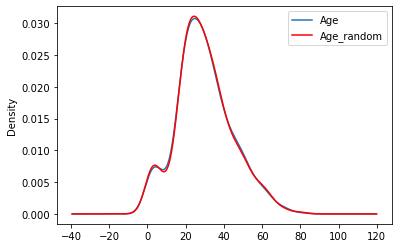

In [75]:
import matplotlib.pyplot as plt
df["Age"].plot(kind ="kde")
df["Age_random"].plot(kind ="kde",color ="red")
plt.legend()

In [ ]:
''' Advantages
easy to implement
less distortion in variance
Disvantage
every situation randomness wont work

In [5]:
##3) capturing NAN values with a new feature
#it work well if the data are not missing completely at random
import numpy as np
import pandas as pd

In [6]:
df =pd.read_csv(r"C:\Users\DellX\Desktop\data science\titenic dataset\train.csv",usecols=["Age","Fare","Survived"])

In [7]:
df["Age_NAN"]=np.where(df["Age"].isnull(),1,0)

In [8]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [9]:
df["Age"].isnull().sum()

177

In [12]:
median =df["Age"].median()

In [13]:
df["Age"].fillna(median,inplace =True)

In [14]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [ ]:
#advantages:
easy to implement
captures the importance of missing values
#disadvantages
creating Additional feature(curse of Dimensionality)

In [17]:
#4) End of distribution imputation
df =pd.read_csv(r"C:\Users\DellX\Desktop\data science\titenic dataset\train.csv",usecols=["Age","Fare","Survived"])

In [18]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


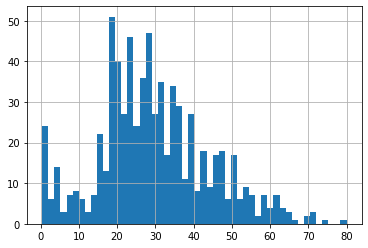

In [19]:
df["Age"].hist(bins =50)

In [21]:
a =df.Age.mean()+3*df.Age.std()

In [31]:
df.Age.std()

13.019696550973194

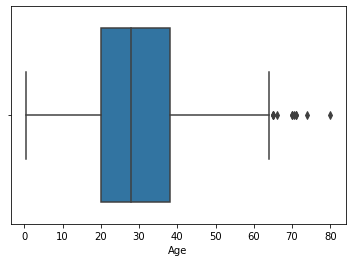

In [23]:
import seaborn as sns
sns.boxplot('Age',data =df)

In [24]:
def impute_nan(df,variable,median,a):
    df[variable+"_end_distribution"] =df[variable].fillna(a)
    df[variable].fillna(median,inplace =True)

In [25]:
impute_nan(df,"Age",df.Age.median(),a)

In [27]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


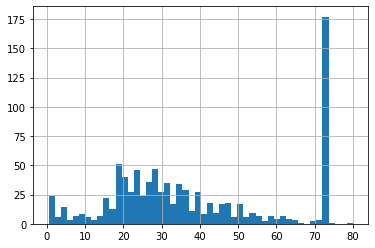

In [28]:
df["Age_end_distribution"].hist(bins =50)

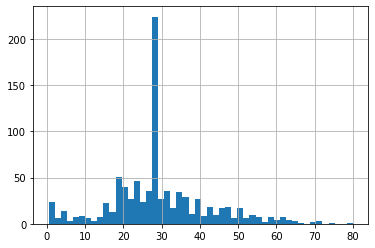

In [29]:
df["Age"].hist(bins =50)

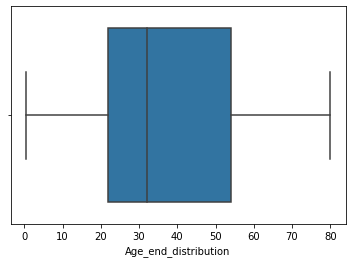

In [30]:
sns.boxplot("Age_end_distribution",data =df)

In [ ]:
#6) Arbitrary  value imputation

this technique was deviedfrom kaggle competetion
it consists of replacing NAN by an arbitrary value

In [38]:
df =pd.read_csv(r"C:\Users\DellX\Desktop\data science\titenic dataset\train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [40]:
def imput_nan(df,variable):
    df[variable+"_hundrad"] =df[variable].fillna(100)
    df[variable+"_zero"] =df[variable].fillna(0)

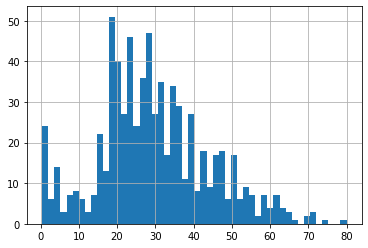

In [39]:
df["Age"].hist(bins =50)

In [ ]:
##arbitrary values
## it should be no more present